In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [14]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

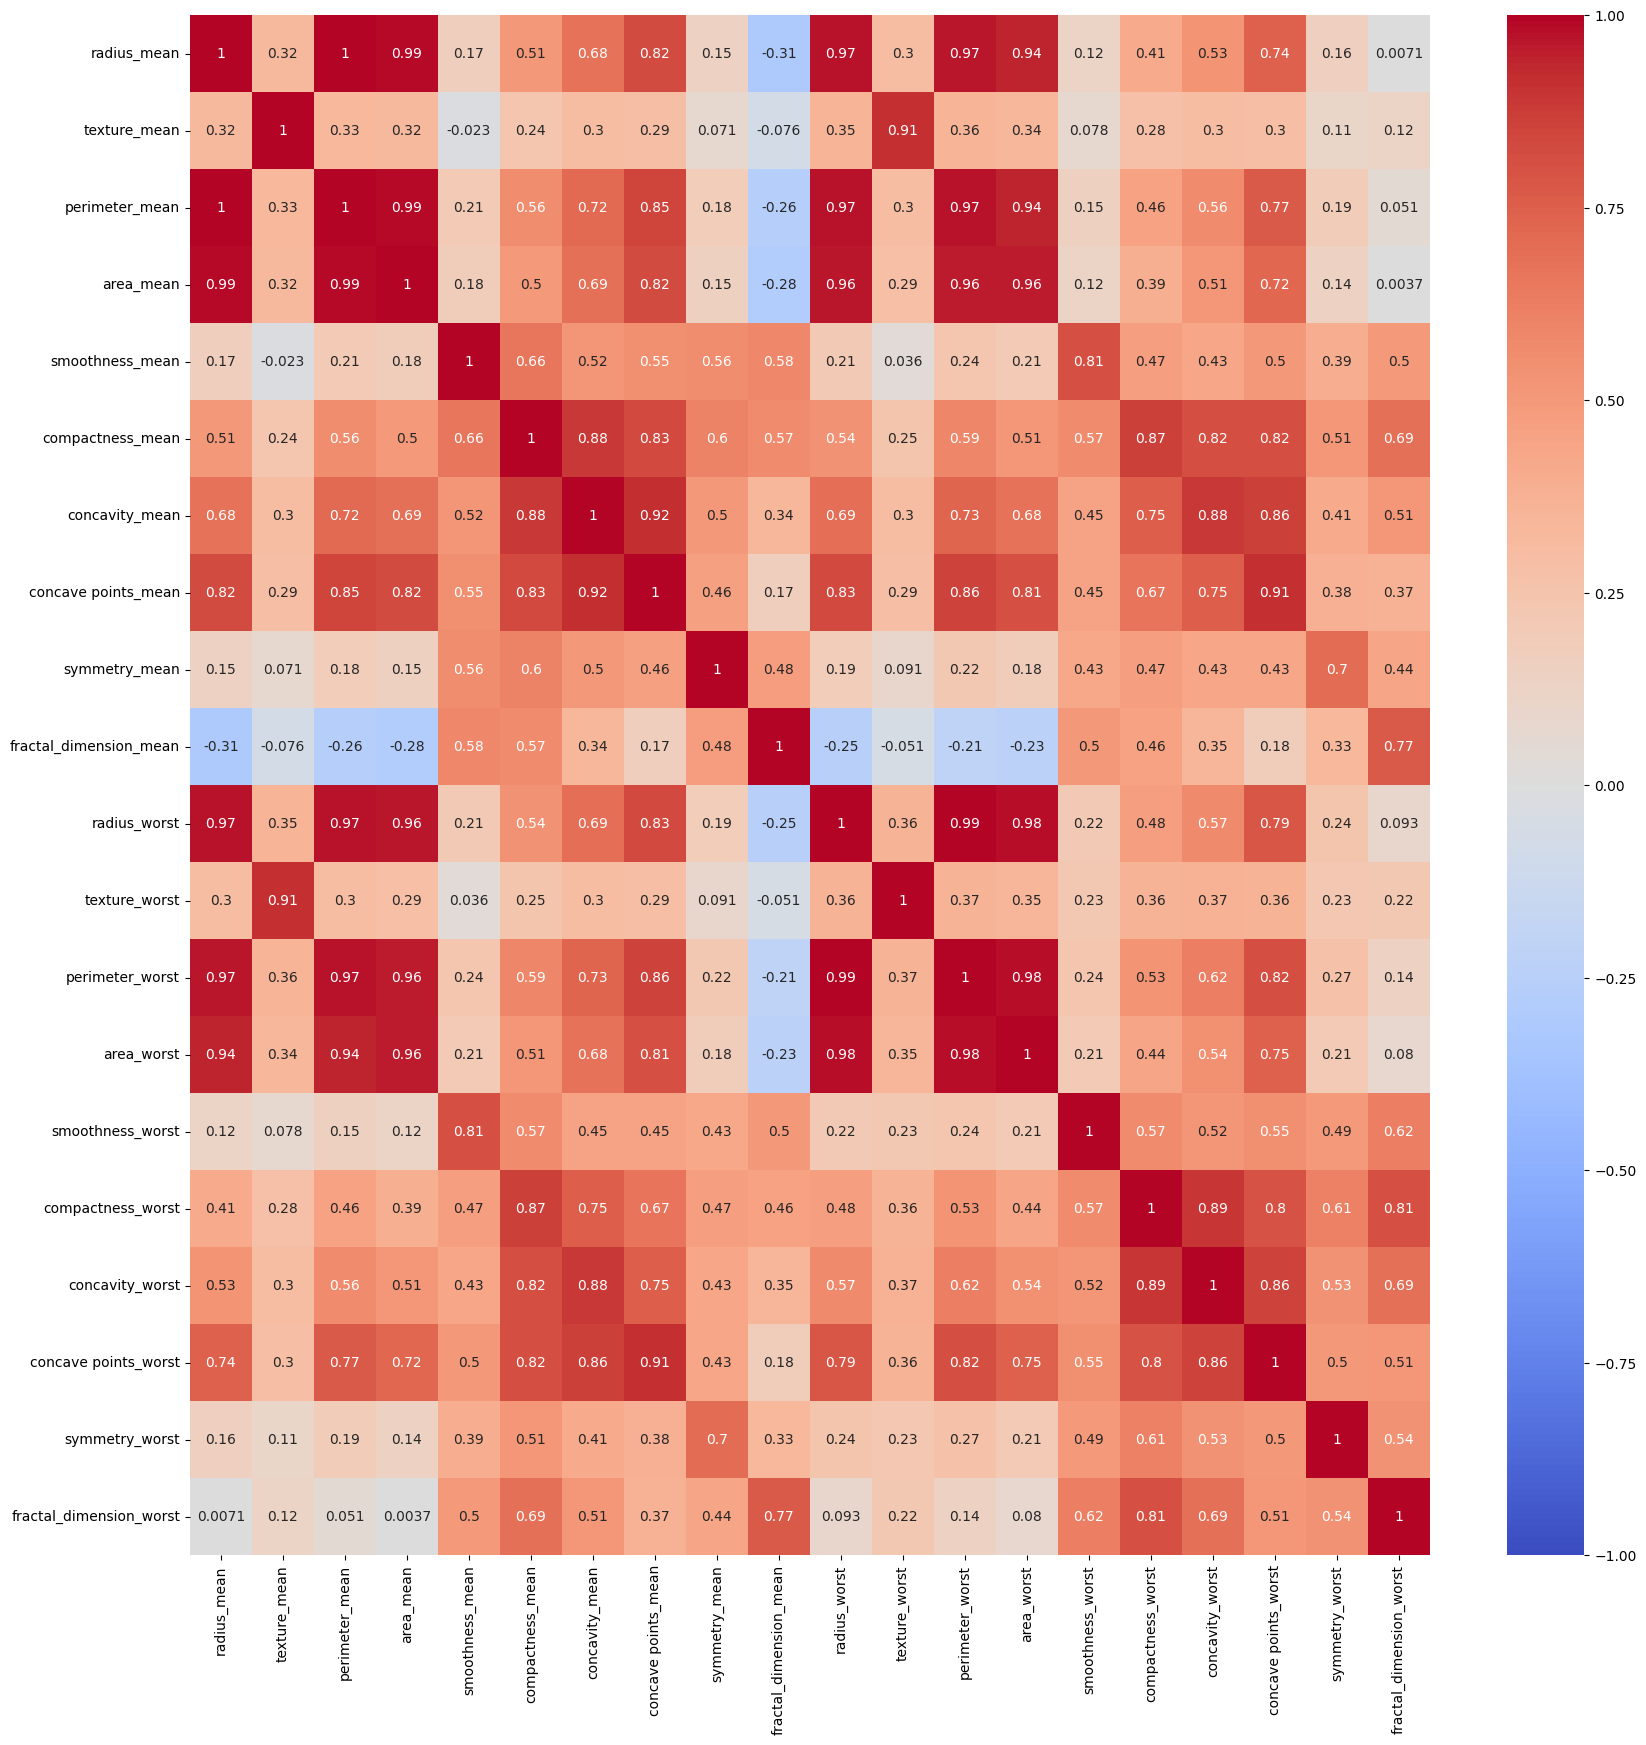

In [16]:
corr = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap = "coolwarm", annot = True, fmt='.2g', vmax=1, vmin=-1)
plt.show()

#  'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#        'fractal_dimension_se'

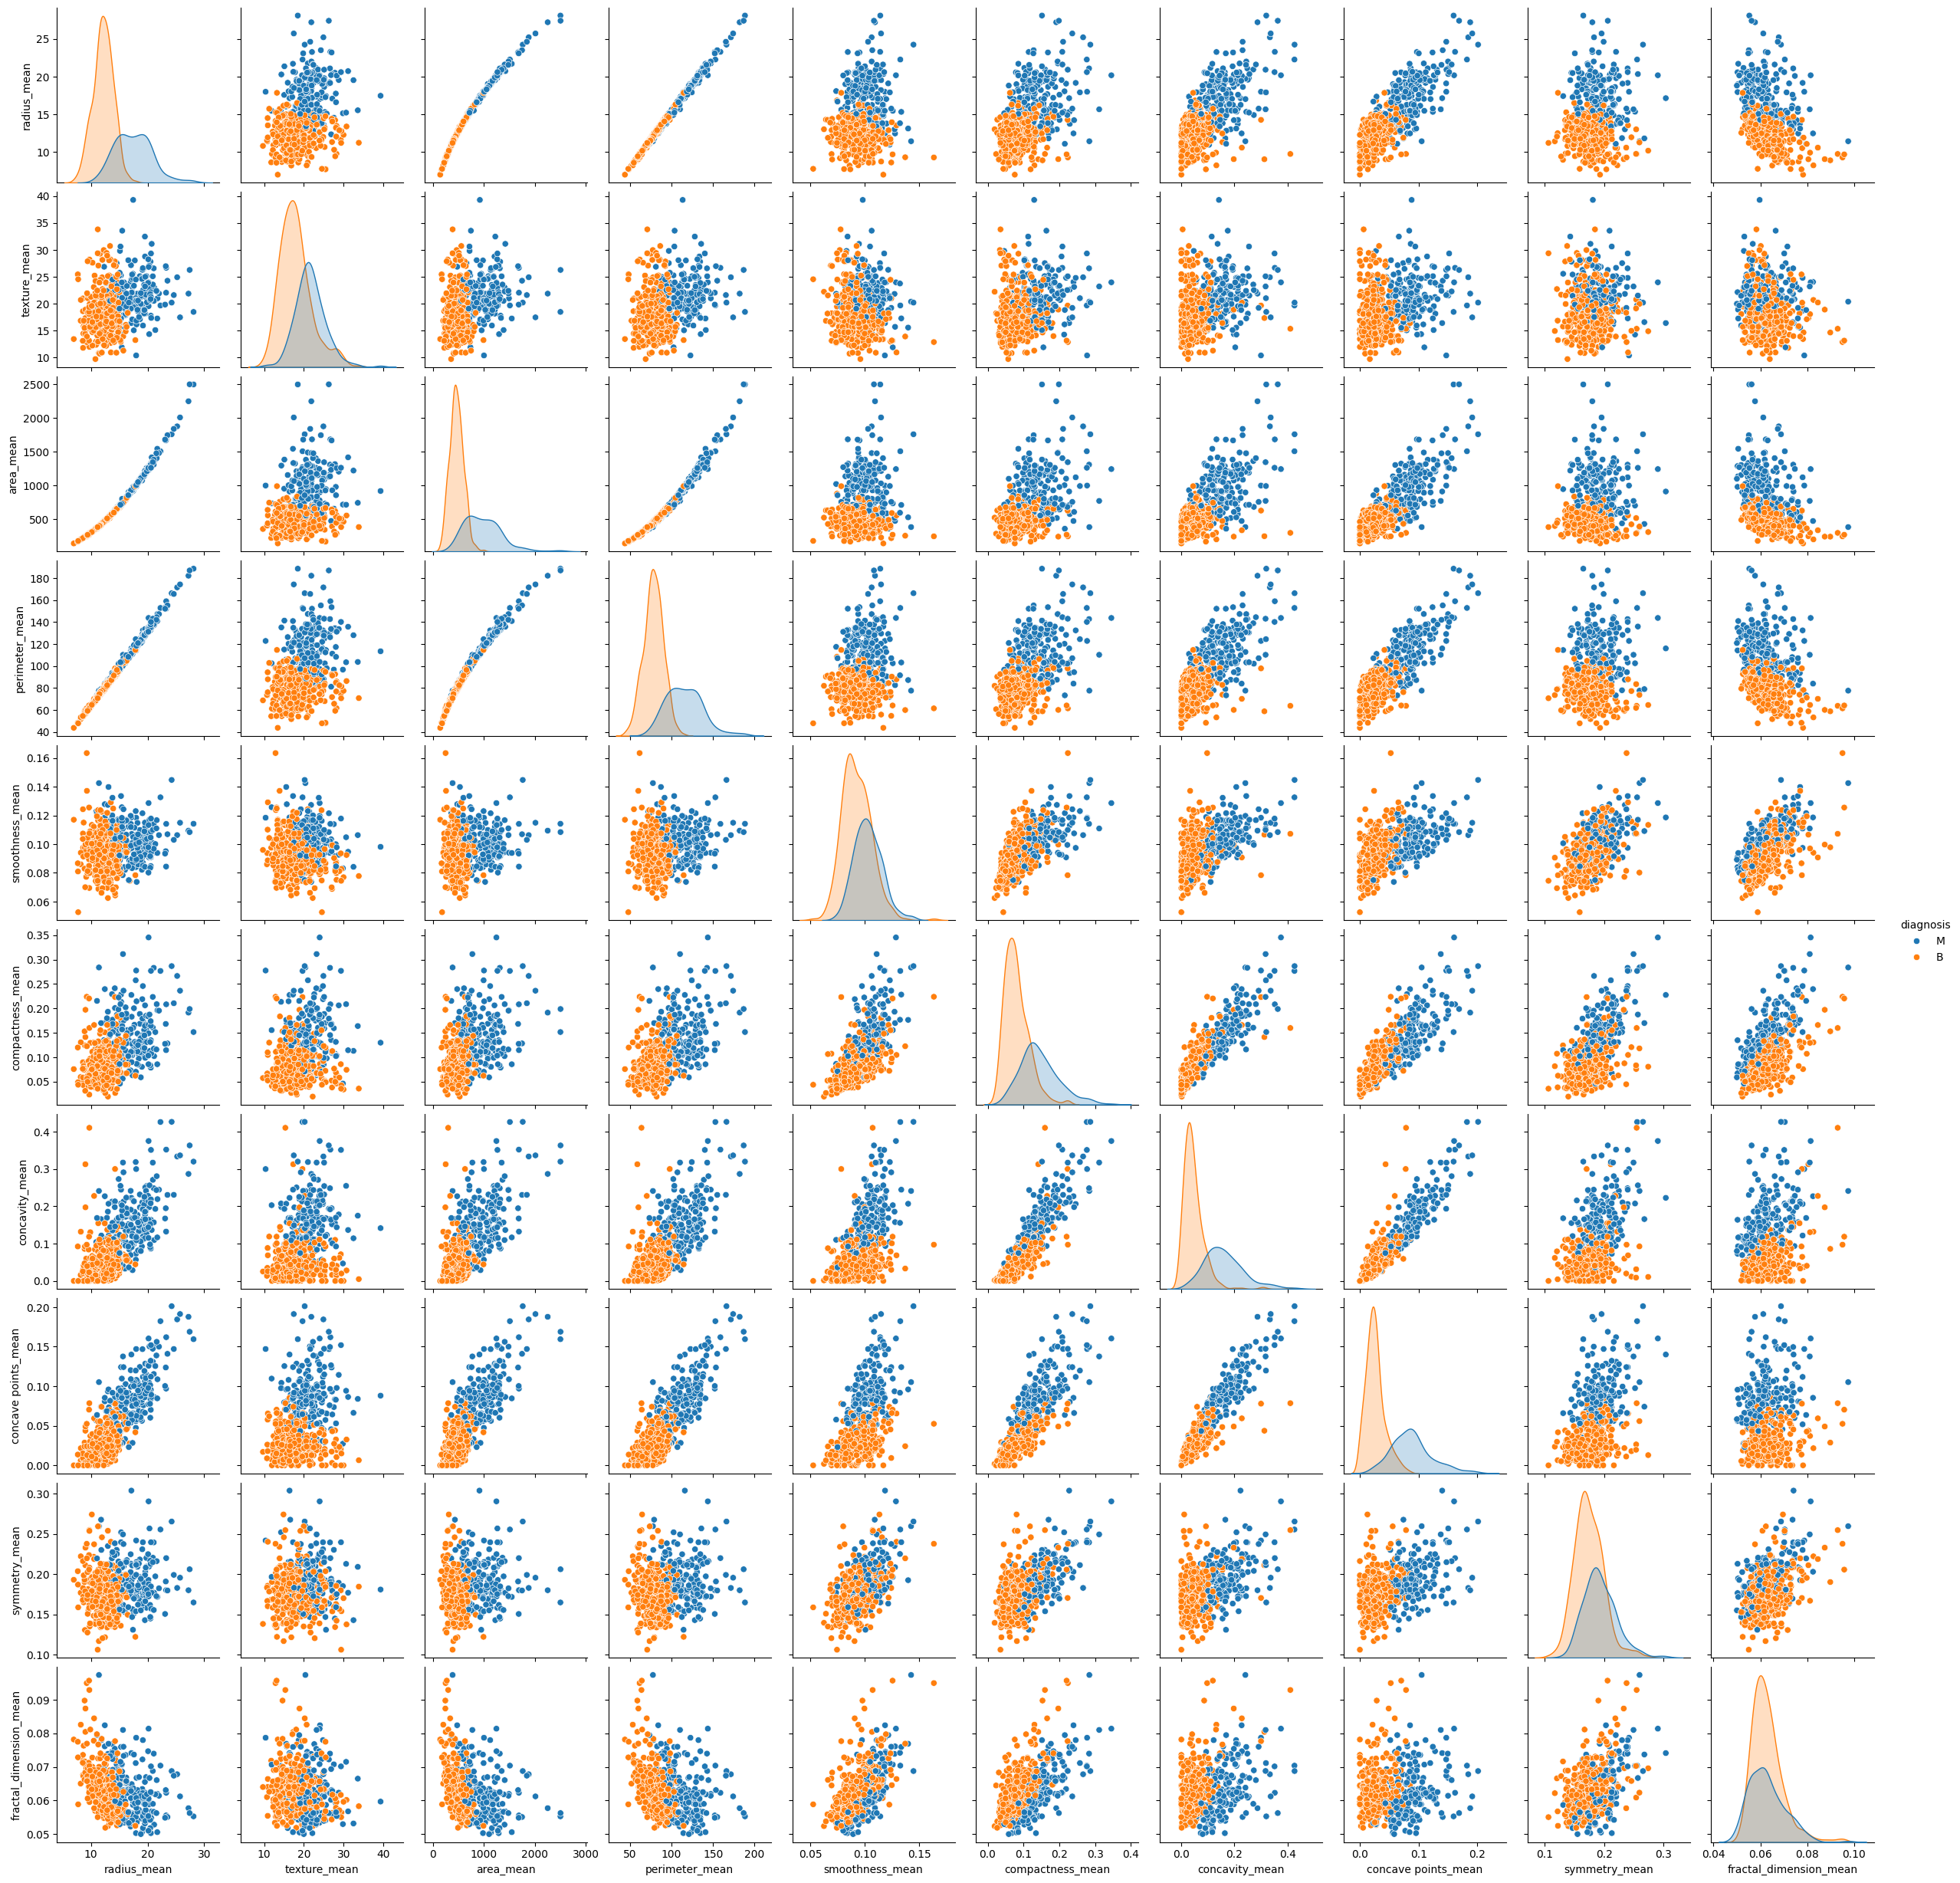

In [17]:
sns.pairplot(df[[ 'radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean','smoothness_mean',  'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']], hue = 'diagnosis')

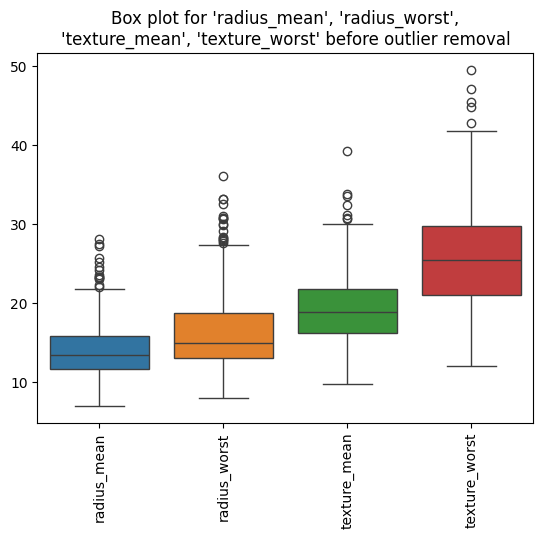

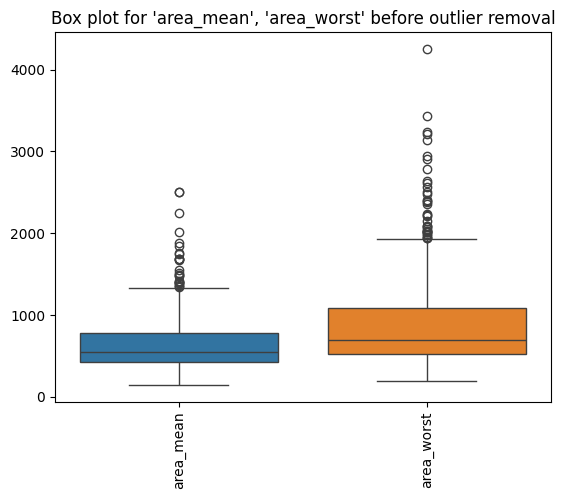

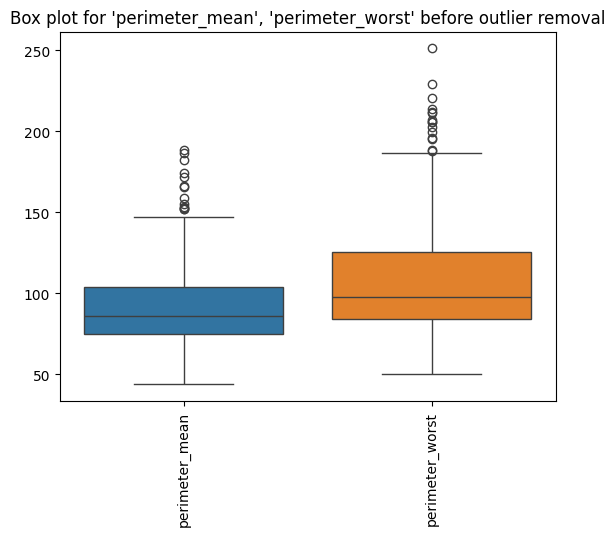

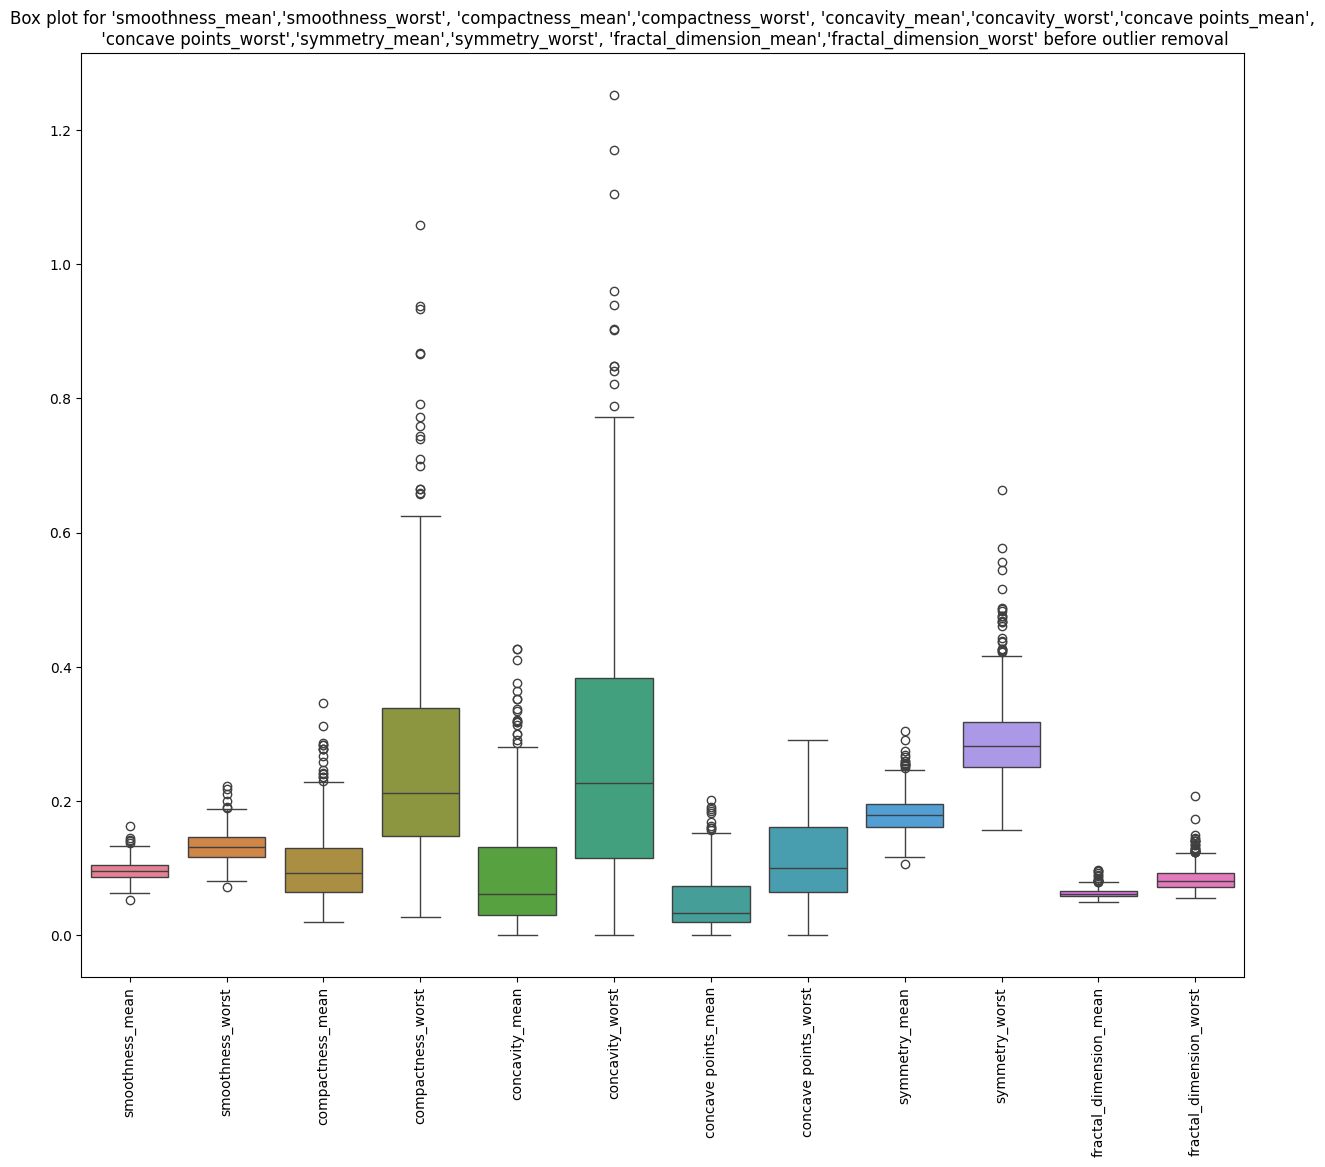

In [18]:
# plt.figure(figsize=(15, 20))

##Creating box plots for the numerical columns
sns.boxplot(df[[ 
        'radius_mean', 'radius_worst','texture_mean', 'texture_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'radius_mean', 'radius_worst',\n'texture_mean', 'texture_worst' before outlier removal")
plt.show()

sns.boxplot(df[['area_mean', 'area_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'area_mean', 'area_worst' before outlier removal")
plt.show()

sns.boxplot(df[['perimeter_mean', 'perimeter_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'perimeter_mean', 'perimeter_worst' before outlier removal")
plt.show()

plt.figure(figsize=(15,12))
sns.boxplot(df[['smoothness_mean','smoothness_worst', 'compactness_mean','compactness_worst', 'concavity_mean','concavity_worst',
       'concave points_mean', 'concave points_worst','symmetry_mean','symmetry_worst', 'fractal_dimension_mean','fractal_dimension_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'smoothness_mean','smoothness_worst', 'compactness_mean','compactness_worst', 'concavity_mean','concavity_worst','concave points_mean',\n 'concave points_worst','symmetry_mean','symmetry_worst', 'fractal_dimension_mean','fractal_dimension_worst' before outlier removal")
plt.show()

# sns.boxplot(df[['radius_se', 'texture_se',]])
# plt.xticks(rotation=90)
# plt.title("Box plot for 'radius_se', 'texture_se' before outlier removal")
# plt.show()

# plt.figure(figsize=(8, 15))
# sns.boxplot(df[['perimeter_se', 'area_se']])
# plt.xticks(rotation=90)
# plt.title("Box plot for 'perimeter_se', 'area_se' before outlier removal")
# plt.show()

# plt.figure(figsize=(15, 20))
# sns.boxplot(df[['smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',]])
# plt.xticks(rotation=90)
# plt.title("Box plot for 'smoothness_se', 'compactness_se', 'concavity_se',\n 'concave points_se', 'symmetry_se', 'fractal_dimension_se' before outlier removal")
# plt.show()

In [19]:
df_copy = df.copy()

In [20]:
#Creating a fucntion to remove outliers using IQR
def iqr_outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        iqr = Q3 - Q1

        upper_limit = Q3 + 1.5 * iqr
        lower_limit = Q1 - 1.5 * iqr

        df_no_outliers = df[(df[col] < upper_limit) & (df[col] > lower_limit)]

    return df_no_outliers

In [21]:
outlier_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst']

df_no_outliers = iqr_outlier(df_copy, outlier_cols)
df_no_outliers.shape

(545, 32)

In [22]:
#Number of ourliers removed
print("Number of outliers removed",df.shape[0] - df_no_outliers.shape[0])
print("Percent of outliers removed",((df.shape[0] - df_no_outliers.shape[0])/df.shape[0]) * 100)

Number of outliers removed 24
Percent of outliers removed 4.21792618629174


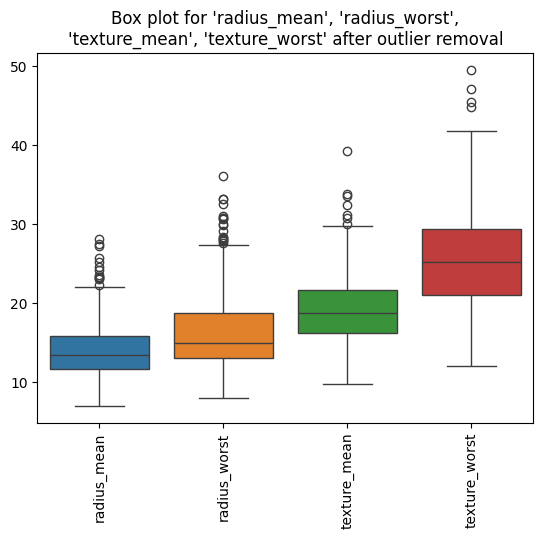

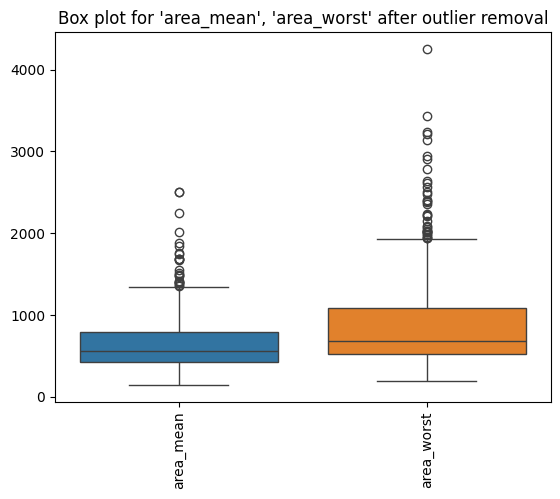

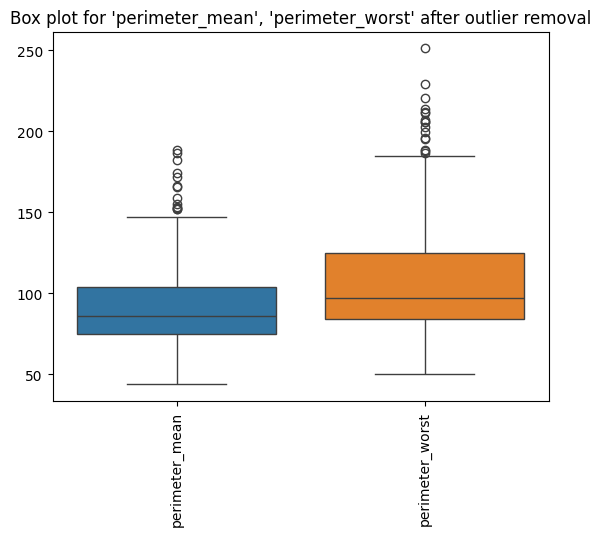

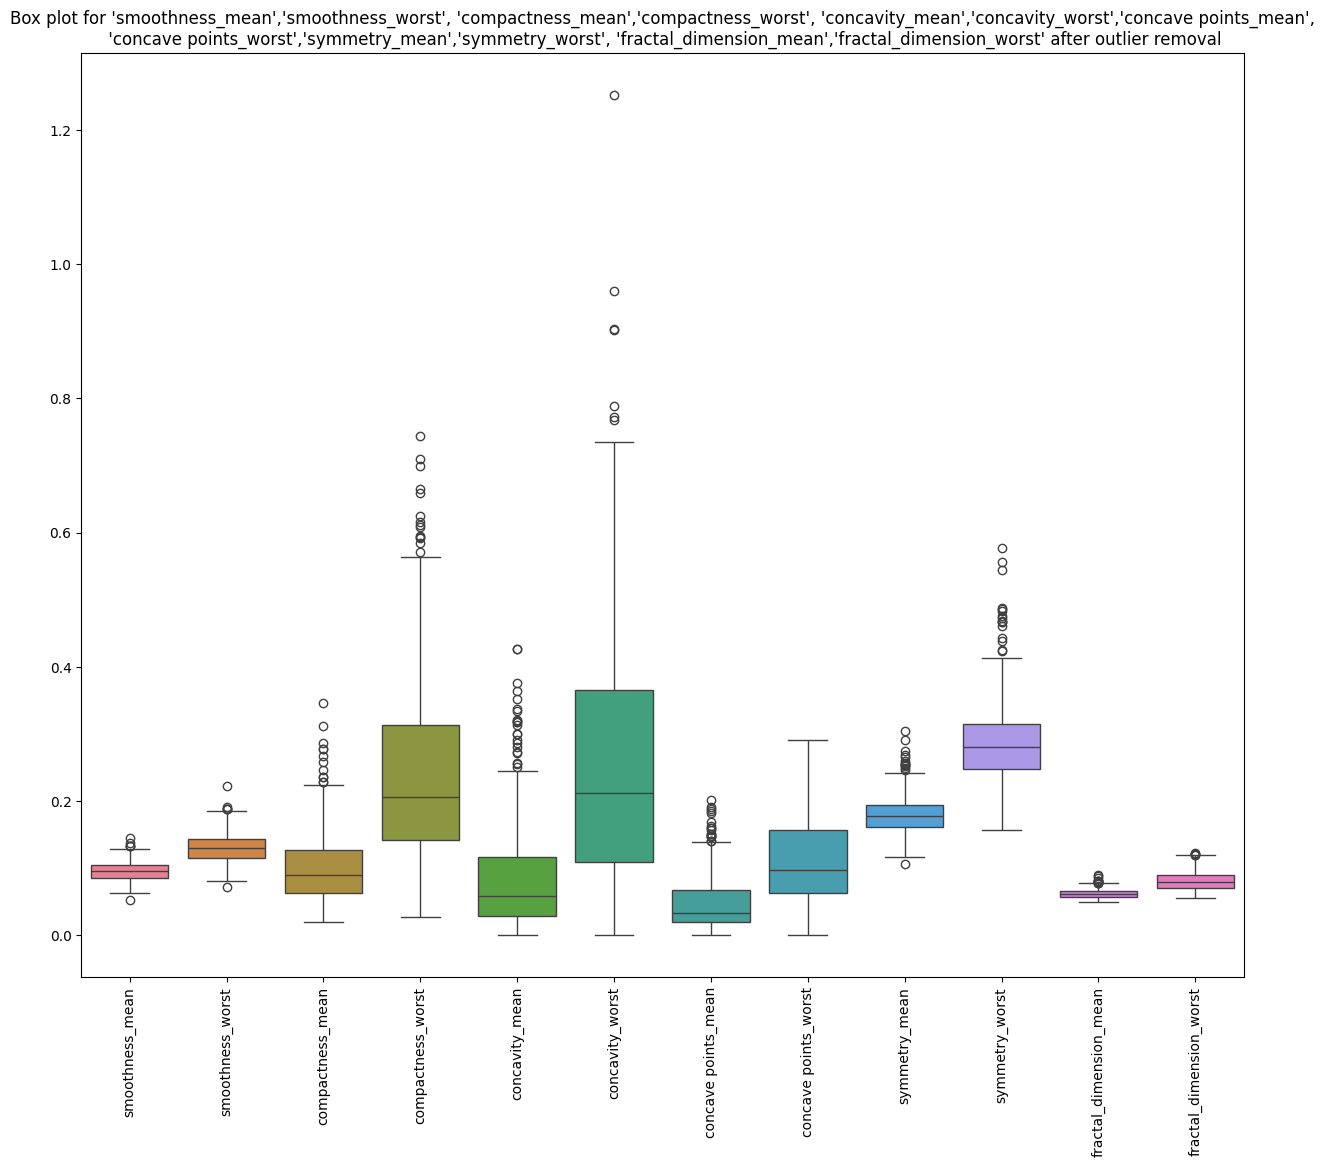

In [23]:


##Creating box plots for the numerical columns after otulier removal
sns.boxplot(df_no_outliers[[ 'radius_mean', 'radius_worst','texture_mean', 'texture_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'radius_mean', 'radius_worst',\n'texture_mean', 'texture_worst' after outlier removal")
plt.show()

sns.boxplot(df_no_outliers[['area_mean', 'area_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'area_mean', 'area_worst' after outlier removal")
plt.show()

sns.boxplot(df_no_outliers[['perimeter_mean', 'perimeter_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'perimeter_mean', 'perimeter_worst' after outlier removal")
plt.show()

plt.figure(figsize=(15,12))
sns.boxplot(df_no_outliers[['smoothness_mean','smoothness_worst', 'compactness_mean','compactness_worst', 'concavity_mean','concavity_worst',
       'concave points_mean', 'concave points_worst','symmetry_mean','symmetry_worst', 'fractal_dimension_mean','fractal_dimension_worst']])
plt.xticks(rotation=90)
plt.title("Box plot for 'smoothness_mean','smoothness_worst', 'compactness_mean','compactness_worst', 'concavity_mean','concavity_worst','concave points_mean',\n 'concave points_worst','symmetry_mean','symmetry_worst', 'fractal_dimension_mean','fractal_dimension_worst' after outlier removal")
plt.show()

# sns.boxplot(df_no_outliers[['radius_se', 'texture_se',]])
# plt.xticks(rotation=90)
# plt.title("Box plot for 'radius_se', 'texture_se' after outlier removal")
# plt.show()

# plt.figure(figsize=(8, 15))
# sns.boxplot(df_no_outliers[['perimeter_se', 'area_se']])
# plt.xticks(rotation=90)
# plt.title("Box plot for 'perimeter_se', 'area_se' after outlier removal")
# plt.show()

# plt.figure(figsize=(15, 20))
# sns.boxplot(df_no_outliers[['smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',]])
# plt.xticks(rotation=90)
# plt.title("Box plot for 'smoothness_se', 'compactness_se', 'concavity_se',\n 'concave points_se', 'symmetry_se', 'fractal_dimension_se' after outlier removal")
# plt.show()

In [24]:
#Removing outliers again since there still seems to some left

df_no_outliers2 = iqr_outlier(df_no_outliers, outlier_cols)

#Number of ourliers removed
print("Number of outliers removed",df.shape[0] - df_no_outliers2.shape[0])
print("Percent of outliers removed",((df.shape[0] - df_no_outliers2.shape[0])/df.shape[0]) * 100)

Number of outliers removed 29
Percent of outliers removed 5.0966608084358525


In [25]:
##encoding diagnosis into 1 and 0
df_no_outliers2['diagnosis_encoded'] = df_no_outliers2['diagnosis'].map({'M':1, 'B':0})
print(df_no_outliers2['diagnosis_encoded'].value_counts())

diagnosis_encoded
0    350
1    190
Name: count, dtype: int64


C:\Users\Rashmi\AppData\Local\Temp\ipykernel_24396\699395740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers2['diagnosis_encoded'] = df_no_outliers2['diagnosis'].map({'M':1, 'B':0})


In [26]:
df['diagnosis_encoded'] = df['diagnosis'].map({'M':1, 'B':0})
print(df['diagnosis_encoded'].value_counts())

diagnosis_encoded
0    357
1    212
Name: count, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

In [29]:
##with no _se features

#model removing area and perimeter

##Scaled and outliers removed

X = df_no_outliers2[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_worst', 'texture_worst','smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = df_no_outliers2[['diagnosis_encoded']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler_2 = StandardScaler()

x_train_scaled = scaler_2.fit_transform(x_train)
x_test_scaled = scaler_2.fit_transform(x_test)

model_3 = LogisticRegression()

model_3.fit(x_train_scaled,y_train)

test_predicted = model_3.predict(x_test_scaled)

acu = accuracy_score(y_test, test_predicted)
print("Accuracy:",acu)

cm = confusion_matrix(y_test, test_predicted)
print("Confusion matrix:")
print(cm)

##FINAL MODEL

Accuracy: 0.9722222222222222
Confusion matrix:
[[67  1]
 [ 2 38]]


c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
##with no _se and _worst features

#model removing area and perimeter

X = df_no_outliers2[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = df_no_outliers2[['diagnosis_encoded']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


scaler_3 = StandardScaler()
x_train_scaled = scaler_3.fit_transform(x_train)
x_test_scaled = scaler_3.fit_transform(x_test)

base_model = LogisticRegression()

base_model.fit(x_train_scaled,y_train)

test_predicted = base_model.predict(x_test_scaled)

acu = accuracy_score(y_test, test_predicted)
print("Accuracy:",acu)

cm = confusion_matrix(y_test, test_predicted)
print("Confusion matrix:")
print(cm)

Accuracy: 0.9259259259259259
Confusion matrix:
[[66  2]
 [ 6 34]]


c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
df_no_outliers2['fractal_dimension_mean'].min()

np.float64(0.04996)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [39]:
X = df_no_outliers2[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = df_no_outliers2[['diagnosis_encoded']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


scaler_4 = StandardScaler()

x_train_scaled = scaler_4.fit_transform(x_train)
x_test_scaled = scaler_4.fit_transform(x_test)

model_5 = LogisticRegression(solver = 'liblinear') ##liblinear gives the best weight (when we use c and panalty)

# model_5.fit(x_train_scaled, y_train)

params = {
    'C':[0.01, 0.1, 1,10],
    'penalty':['l1', 'l2'] #ridge and lasso
}

grid = GridSearchCV(model_5, params, cv = 5, scoring ='accuracy')
grid.fit(x_train_scaled, y_train)

print("best params:", grid.best_params_)

best_model_param = grid.best_estimator_
best_model_param

final_tuned_model = LogisticRegression(C = 1, penalty='l2')
final_tuned_model.fit(x_train_scaled, y_train)
test_predicted = final_tuned_model.predict(x_test_scaled)

acu = accuracy_score(y_test, test_predicted)
print("Accuracy:",acu)

cm = confusion_matrix(y_test, test_predicted)
print("Confusion matrix:")
print(cm)

c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: D

best params: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.9259259259259259
Confusion matrix:
[[66  2]
 [ 6 34]]


In [41]:
import pickle

#Saving the base model
with open('base_model_breast_cancer.pkl', 'wb') as file:
    pickle.dump(base_model, file)

#Saving the base model
with open('final_tuned_model_breast_cancer.pkl', 'wb') as file:
    pickle.dump(final_tuned_model, file)

In [ ]:
#model remving area and perimeter (outlier removed and scaled as well)

#removing correlated columns (radius is correlated to area, perimeter)

X = df_no_outliers2[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se',  'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst','smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = df_no_outliers2[['diagnosis_encoded']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Initialize the scaler
scaler_1 = StandardScaler()
# Scaling x values

x_train_scaled = scaler_1.fit_transform(x_train)
x_test_scaled = scaler_1.fit_transform(x_test)

model_2 = LogisticRegression()

model_2.fit(x_train_scaled,y_train)

test_predicted = model_2.predict(x_test_scaled)

acu = accuracy_score(y_test, test_predicted)
print("Accuracy:",acu)

cm = confusion_matrix(y_test, test_predicted)
print("Confusion matrix:")
print(cm)

In [19]:
#Main model (no outlier  removal or scaling)
# 
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y=df[['diagnosis_encoded']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model_1 = LogisticRegression()

model_1.fit(x_train,y_train)

test_predicted = model_1.predict(x_test)

acu = accuracy_score(y_test, test_predicted)
print("Accuracy:",acu)

cm = confusion_matrix(y_test, test_predicted)
print("Confusion matrix:")
print(cm)

Accuracy: 0.9824561403508771
Confusion matrix:
[[73  0]
 [ 2 39]]


c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9722222222222222
Confusion matrix:
[[67  1]
 [ 2 38]]


c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9722222222222222
Confusion matrix:
[[67  1]
 [ 2 38]]


c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9259259259259259
Confusion matrix:
[[66  2]
 [ 6 34]]


c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best params: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.9629629629629629
Confusion matrix:
[[67  1]
 [ 3 37]]


c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rashmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: D